<a href="https://colab.research.google.com/github/kahingala/Colab2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize the dataset

Target labels:  [2 7 1 8 1 6 5 8 3 7]


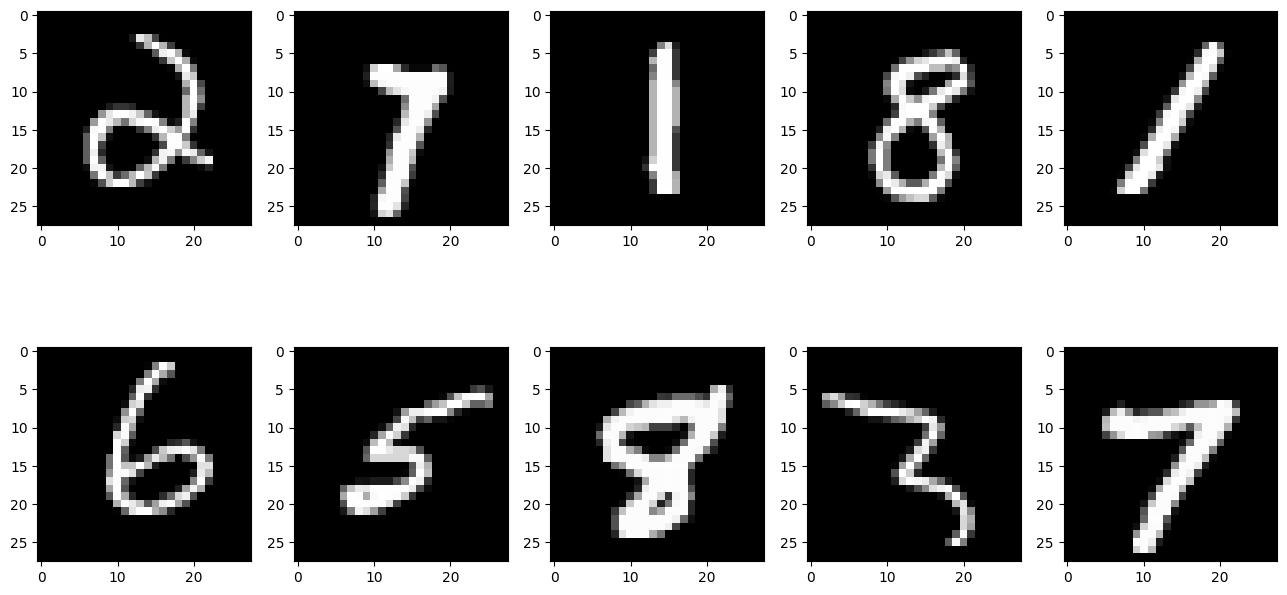

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8393 - loss: 0.5303
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9603 - loss: 0.1330
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9707 - loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9774 - loss: 0.0753
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0626
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9872 - loss: 0.0416
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0371
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9895 - loss: 0.0320
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9911 - loss: 0.0269


Plot the loss and accuracy graphs

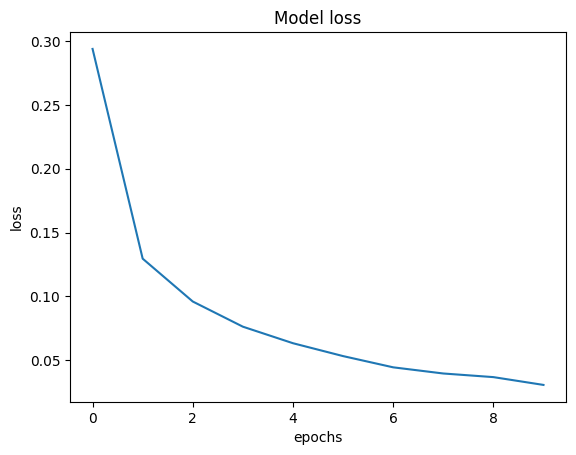

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

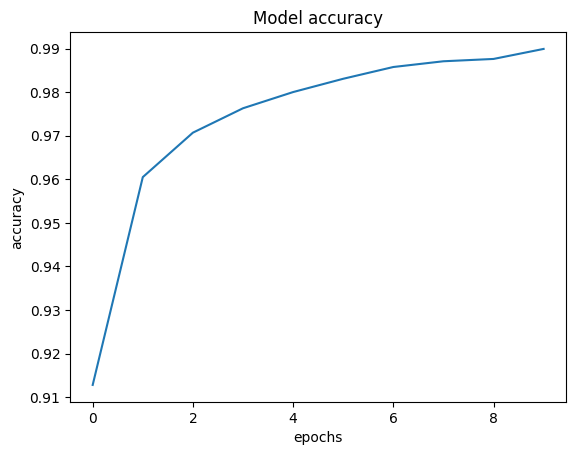

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1217
Loss of the Test dataset is: 0.10484461486339569
Accuracy of the test dataset is: 0.9743000268936157


Save the model weights

In [13]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [17]:
from tensorflow.keras.optimizers import Adam

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]

results = {}

for lr in learning_rates:
    for bs in batch_sizes:
        print(f"\n🔹 Training with lr={lr}, batch_size={bs}")

        # Build model again
        model = Sequential([
            Flatten(input_shape=(28,28)),
            Dense(256, activation='relu'),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=lr),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

        history = model.fit(new_train_data , new_train_target,
                            epochs=10,
                            batch_size=bs,
                            validation_data=(new_test_data , new_test_target),
                            verbose=0)  # silent training

        # Evaluate on test set
        test_loss, test_acc = model.evaluate(new_test_data , new_test_target, verbose=0)
        print(f"✅ Test accuracy: {round(test_acc*100,2)} %")

        # Save results
        results[(lr, bs)] = test_acc



🔹 Training with lr=0.01, batch_size=32
✅ Test accuracy: 95.87 %

🔹 Training with lr=0.01, batch_size=64
✅ Test accuracy: 97.02 %

🔹 Training with lr=0.01, batch_size=128
✅ Test accuracy: 97.22 %

🔹 Training with lr=0.001, batch_size=32
✅ Test accuracy: 97.75 %

🔹 Training with lr=0.001, batch_size=64
✅ Test accuracy: 97.88 %

🔹 Training with lr=0.001, batch_size=128
✅ Test accuracy: 98.11 %

🔹 Training with lr=0.0001, batch_size=32
✅ Test accuracy: 97.61 %

🔹 Training with lr=0.0001, batch_size=64
✅ Test accuracy: 97.42 %

🔹 Training with lr=0.0001, batch_size=128
✅ Test accuracy: 96.9 %


In [18]:
best_params = max(results, key=results.get)
print(f"\n🏆 Best Hyperparameters: Learning Rate={best_params[0]}, Batch Size={best_params[1]}")
print(f"Best Accuracy: {round(results[best_params]*100,2)} %")



🏆 Best Hyperparameters: Learning Rate=0.001, Batch Size=128
Best Accuracy: 98.11 %


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam

# Build model with L1 + L2 regularization
model = Sequential([
    Flatten(input_shape=(28,28)),

    # Hidden layer 1 with L1 and L2 regularization
    Dense(256, activation='relu',
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),

    Dropout(0.3),  # still good to use dropout

    # Hidden layer 2
    Dense(128, activation='relu',
          kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),

    # Output layer
    Dense(10, activation='softmax',
          kernel_regularizer=l2(1e-4))  # sometimes only L2 on output
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(new_train_data , new_train_target,
                    epochs=15,
                    batch_size=128,
                    validation_data=(new_test_data , new_test_target))


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8280 - loss: 0.7029 - val_accuracy: 0.9619 - val_loss: 0.2403
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9562 - loss: 0.2559 - val_accuracy: 0.9695 - val_loss: 0.2066
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9657 - loss: 0.2139 - val_accuracy: 0.9731 - val_loss: 0.1916
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9717 - loss: 0.1951 - val_accuracy: 0.9715 - val_loss: 0.1854
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9751 - loss: 0.1799 - val_accuracy: 0.9745 - val_loss: 0.1749
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9779 - loss: 0.1693 - val_accuracy: 0.9765 - val_loss: 0.1679
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9782 - loss: 0.1658 - val_accuracy: 0.9804 - val_loss: 0.1561
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9805 - loss: 0.1574 - val_ac

In [25]:
# Evaluate model
test_loss, test_acc = model.evaluate(new_test_data , new_test_target, verbose=0)
print("✅ Test Accuracy with Regularization:", round(test_acc*100, 2), "%")


✅ Test Accuracy with Regularization: 98.29 %


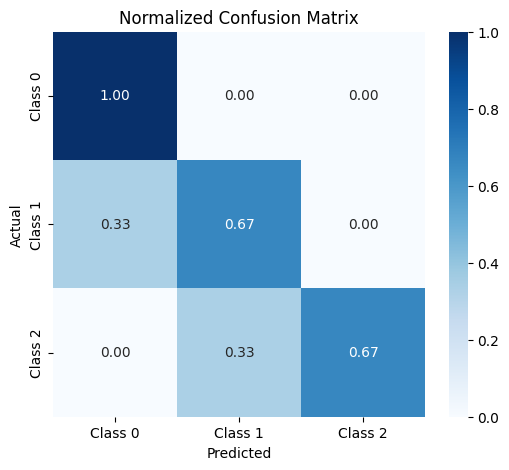

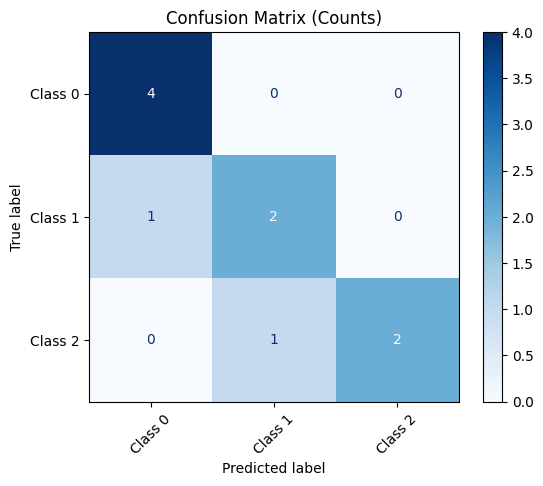

In [27]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true and predicted labels
y_true = [0, 1, 2, 2, 0, 1, 0, 2, 1, 0]   # Actual labels from test set
y_pred = [0, 0, 2, 2, 0, 1, 0, 1, 1, 0]   # Predicted labels by model
class_names = ['Class 0', 'Class 1', 'Class 2']  # Class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, None]  # normalize by row

# --- Option 1: Seaborn heatmap (with percentages) ---
plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# --- Option 2: Using sklearn's ConfusionMatrixDisplay ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (Counts)')
plt.show()
